# 1.数据加载
# 2.数据EDA与特征工程
# 3.模型训练与预测
# 4.提交结果得到分数

In [401]:
### 导包
print("开始导包")
import pandas as pd
import numpy as np
import warnings
import time 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
print("导包完毕")

开始导包
导包完毕


# 1.数据加载

In [402]:
train=pd.read_csv("./train.csv",index_col = 0)#
test=pd.read_csv("./test1.csv",index_col=0)#直接读取文件  发现可以把第一列当列索引
train

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,6.0,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,6.0,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,0.0,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,2.0,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,2.0,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,392477,1028,46000.0,1920.0,3.0,1080.0,1,zh-CN,144,6.0,Android,7.1.2,25,1546078,1.559834e+12,7,861755946,79,140647032,373
499996,346134,1001,0.0,1424.0,0.0,720.0,0,NaN,29,2.0,android,8.1.0,0,1480612,1.559814e+12,3,1714444511,23,2745131047,525
499997,499635,761,46000.0,1280.0,0.0,720.0,0,NaN,54,6.0,android,6.0.1,9,1698442,1.559676e+12,0,3843262581,25,1326115882,810
499998,239786,917,46001.0,960.0,0.0,540.0,0,zh_CN,109,2.0,android,5.1.1,0,1331155,1.559840e+12,0,1984296118,225,1446741112,772


In [403]:
test#test也是这么多，少了一个标签列

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,317625,1181,46000.0,2196.0,2.0,1080.0,CN,639,2.0,Android,8.1.0,188,1440682,1.559872e+12,7,1672223856,57,3872258917,658
1,435108,944,46003.0,2280.0,3.0,1080.0,zh-CN,704,6.0,Android,8.1.0,221,1606824,1.559739e+12,3,3767901757,23,129322164,943
2,0,1106,46000.0,0.0,0.0,0.0,NaN,39,2.0,android,5.1,1562,1774642,1.559614e+12,0,454638703,30,4226678391,411
3,451504,761,46000.0,1344.0,0.0,720.0,NaN,54,2.0,android,7.1.1,9,1742535,1.559668e+12,0,1507622951,65,3355419572,848
4,0,1001,46000.0,665.0,0.0,320.0,zh-CN,29,5.0,Android,8.1.0,4,1689686,1.559694e+12,0,4116351093,148,2644467751,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,1001,46000.0,760.0,0.0,360.0,zh-CN,29,2.0,Android,8.1.0,4,1165373,1.559957e+12,0,3162887451,126,2711576615,411
149996,0,1001,46000.0,780.0,0.0,360.0,zh-CN,29,2.0,Android,9.0.0,4,1444115,1.559863e+12,0,97238959,322,2678022183,411
149997,0,1001,46000.0,780.0,0.0,360.0,zh-CN,29,5.0,Android,8.1.0,4,1134378,1.560041e+12,0,1320118495,46,2610913319,411
149998,500925,1052,46000.0,854.0,240.0,480.0,zh-CN,249,6.0,android,4.4.2,0,1700238,1.559688e+12,2,1292986591,41,1898209327,430


# 2.数据EDA与特征工程

In [404]:
train.info()#进行一下数据的探索,可以看到很多数据类型 object我们要将其转换为数值类型的

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  500000 non-null  int64  
 1   apptype     500000 non-null  int64  
 2   carrier     500000 non-null  float64
 3   dev_height  500000 non-null  float64
 4   dev_ppi     500000 non-null  float64
 5   dev_width   500000 non-null  float64
 6   label       500000 non-null  int64  
 7   lan         316720 non-null  object 
 8   media_id    500000 non-null  int64  
 9   ntt         500000 non-null  float64
 10  os          500000 non-null  object 
 11  osv         493439 non-null  object 
 12  package     500000 non-null  int64  
 13  sid         500000 non-null  int64  
 14  timestamp   500000 non-null  float64
 15  version     500000 non-null  object 
 16  fea_hash    500000 non-null  object 
 17  location    500000 non-null  int64  
 18  fea1_hash   500000 non-null  int64  
 19  cu

In [405]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  150000 non-null  int64  
 1   apptype     150000 non-null  int64  
 2   carrier     150000 non-null  float64
 3   dev_height  150000 non-null  float64
 4   dev_ppi     150000 non-null  float64
 5   dev_width   150000 non-null  float64
 6   lan         94453 non-null   object 
 7   media_id    150000 non-null  int64  
 8   ntt         150000 non-null  float64
 9   os          150000 non-null  object 
 10  osv         148008 non-null  object 
 11  package     150000 non-null  int64  
 12  sid         150000 non-null  int64  
 13  timestamp   150000 non-null  float64
 14  version     150000 non-null  object 
 15  fea_hash    150000 non-null  object 
 16  location    150000 non-null  int64  
 17  fea1_hash   150000 non-null  int64  
 18  cus_type    150000 non-null  int64  
dtypes:

In [406]:
#可以通过一句代码来实现找出所有的object类型的东西
object_cols=train.select_dtypes(include="object").columns#这样就把这几列都拿出来了  就是我们要转换成数值类型的几列
object_cols#

Index(['lan', 'os', 'osv', 'version', 'fea_hash'], dtype='object')

In [407]:
#刚才看了一下数据的info 还是有很多数据不是50000吧 那应该是有缺失值的  可以来看看
train.isnull().sum()#看出来了 lan和osv这两列缺失的比较多

android_id         0
apptype            0
carrier            0
dev_height         0
dev_ppi            0
dev_width          0
label              0
lan           183280
media_id           0
ntt                0
os                 0
osv             6561
package            0
sid                0
timestamp          0
version            0
fea_hash           0
location           0
fea1_hash          0
cus_type           0
dtype: int64

In [408]:
test.isnull().sum()#test里面也是lan和osv缺失的比较多

android_id        0
apptype           0
carrier           0
dev_height        0
dev_ppi           0
dev_width         0
lan           55547
media_id          0
ntt               0
os                0
osv            1992
package           0
sid               0
timestamp         0
version           0
fea_hash          0
location          0
fea1_hash         0
cus_type          0
dtype: int64

In [409]:
#看一下lan的数据分布
train['lan'].value_counts()#这个lan代表语言 可以看到是以中文居多 其他的较少

zh-CN          244474
zh              30574
cn              20685
zh_CN           11602
Zh-CN            8122
zh-cn             642
ZH                185
CN                168
tw                119
en                 89
zh_CN_#Hans        26
ko                 11
zh-TW               7
en-US               3
zh-HK               3
ja                  2
TW                  2
it                  2
en-GB               2
mi                  1
zh-MO               1
Name: lan, dtype: int64

In [410]:
#s所有的object类型都要进行一下转行 所以 可以先把所有的object类型都筛选出来
object_cols=train.select_dtypes(include="object").columns#这样就把所有数值类型为object类型的都筛选出来了
object_cols

Index(['lan', 'os', 'osv', 'version', 'fea_hash'], dtype='object')

### object类型的字段 'lan', 'os', 'osv', 'version', 'fea_hash'
### 有缺失值的字段 'lan','osv'

In [411]:
#下一步我们看看唯一值的个数
features=train.columns
print(features,features.shape)#这样就得到了所有的特征 是20个 跟上面是对应的，包括label也在里面 

Index(['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'label', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package',
       'sid', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash',
       'cus_type'],
      dtype='object') (20,)


In [412]:
#我们需要把label给去掉
features=features.tolist()
features.remove("label")
print(features,"features的类型和长度分别是:",type(features),len(features))

['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi', 'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package', 'sid', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type'] features的类型和长度分别是: <class 'list'> 19


In [413]:
for feature in features:
    print(feature,"中唯一值的个数是:",train[feature].nunique())#唯一值很小的 可以看看  一般认为它没有太多意义

android_id 中唯一值的个数是: 362258
apptype 中唯一值的个数是: 89
carrier 中唯一值的个数是: 5
dev_height 中唯一值的个数是: 798
dev_ppi 中唯一值的个数是: 92
dev_width 中唯一值的个数是: 346
lan 中唯一值的个数是: 21
media_id 中唯一值的个数是: 284
ntt 中唯一值的个数是: 8
os 中唯一值的个数是: 2
osv 中唯一值的个数是: 154
package 中唯一值的个数是: 1950
sid 中唯一值的个数是: 500000
timestamp 中唯一值的个数是: 500000
version 中唯一值的个数是: 22
fea_hash 中唯一值的个数是: 402980
location 中唯一值的个数是: 332
fea1_hash 中唯一值的个数是: 4959
cus_type 中唯一值的个数是: 58


In [414]:
#比如我们看到os只有两列，那么我们去看看它到底什么情况  
train['os'].value_counts()#这样我们就看到结果了 只有两个值 而且都是安卓 所以我们认为这一列对我们最后的结果影响不大 就没有必要放到建模特征吧

android    303175
Android    196825
Name: os, dtype: int64

In [415]:
test['os'].value_counts()#也全部都是安卓 测试集里面

android    91117
Android    58883
Name: os, dtype: int64

In [416]:
#object类型里面也有一个fea_hash 去看看它到底是什么个情况
train['fea_hash']#这里是个保密数据 而且数值都很大 所以这个时候 先简单的用一种方法处理一下吧  变成数值类型

0         2135019403
1         2782306428
2         1392806005
3         3562553457
4         2364522023
             ...    
499995     861755946
499996    1714444511
499997    3843262581
499998    1984296118
499999    1697301943
Name: fea_hash, Length: 500000, dtype: object

In [417]:
train['fea_hash'].value_counts()#可以看到有402980个数据 这个跟上面的唯一值的个数是对应的上的 最多的一个数据出现了110次 

68083895      110
235856055      99
51306679       91
2815114810     77
16777343       60
             ... 
2114855274      1
2645522329      1
306330991       1
3839243835      1
1076748331      1
Name: fea_hash, Length: 402980, dtype: int64

In [418]:
train['fea_hash'].describe()#可以看到这列数据有50000个数据 唯一值的个数  最高频率出现的数字和出现想频率 这个跟上面的数据探索结果是一样的

count       500000
unique      402980
top       68083895
freq           110
Name: fea_hash, dtype: object

In [419]:
#我们可以通过数字的长度 做一个映射  在一定范围内的 分类
train['fea_hash'].map(lambda x:len(str(x)))#这样是把数据打印出来了 不过还是得看一下分布

0         10
1         10
2         10
3         10
4         10
          ..
499995     9
499996    10
499997    10
499998    10
499999    10
Name: fea_hash, Length: 500000, dtype: int64

In [420]:
train['fea_hash'].map(lambda x:len(str(x))).value_counts()#可以看到字符串长度出现最多的是10个 通过长度做一个映射

10    378925
9     108904
8      11235
7        740
6         93
38        37
39        28
37        16
5         11
36         3
33         2
32         2
1          2
31         1
30         1
Name: fea_hash, dtype: int64

In [421]:
#先看下osv osv的物理含义是 操作系统的版本
train['osv']#前面对os也就是操作系统进行过一些探索 就是安卓 这里全部数据都是安卓的

0             9
1           8.1
2         8.1.0
3         8.1.0
4         8.0.0
          ...  
499995    7.1.2
499996    8.1.0
499997    6.0.1
499998    5.1.1
499999    8.1.0
Name: osv, Length: 500000, dtype: object

In [422]:
train['osv'].value_counts()#这里就看到了安卓版本的数量分布情况 不过还是有一些奇奇怪怪的东西

8.1.0                                 151419
9                                      71332
6.0.1                                  31714
7.1.1                                  26503
9.0.0                                  24385
                                       ...  
2.9.2                                      1
f073b_changxiang_v01_b1b8_20180915         1
5.3.0                                      1
2.2.2                                      1
2.3.7                                      1
Name: osv, Length: 154, dtype: int64

In [423]:
try_str='5.0.3'
def osv_trans(x):
    x=str(x).replace('Android_','').replace('Android ','').replace('W','')
    if str(x).find('.')>0:#如果字符串有 “.” 
        temp_index1=x.find('.')
        if x.find(" ")>0:
            temp_index2=x.find(' ')
        else:
            temp_index2=len(x)

        if x.find("-")>0:
            temp_index2=x.find('-')

        result=x[0:temp_index1]+'.'+x[temp_index1+1:temp_index2].replace('.','')
        try:
            return float(result)
        except:
            return 0
    try:
        return float(x)
    except:
        return 0  
osv_trans(try_str)

5.03

In [424]:
train['osv'].fillna("8.1.0",inplace=True)
train['osv'].isnull().sum()#这一下就没有缺失值了

0

In [425]:
#写一个函数 把上面的特征进行一些处理 
def osv_trans(x):
    x=str(x).replace('Android_','').replace('Android ','').replace('W','')
    if str(x).find('.')>0:#如果字符串有 “.” 
        temp_index1=x.find('.')
        if x.find(" ")>0:
            temp_index2=x.find(' ')
        else:
            temp_index2=len(x)

        if x.find("-")>0:
            temp_index2=x.find('-')


        result=x[0:temp_index1]+'.'+x[temp_index1+1:temp_index2].replace('.','')
        try:
            return float(result)
        except:
            return 0

    try:
        return float(x)
    except:
        return 0

train['osv'].apply(osv_trans)

0         9.00
1         8.10
2         8.10
3         8.10
4         8.00
          ... 
499995    7.12
499996    8.10
499997    6.01
499998    5.11
499999    8.10
Name: osv, Length: 500000, dtype: float64

In [426]:
train['osv']=train['osv'].apply(osv_trans)
train['osv'].value_counts()

8.100    185324
9.000    104684
6.010     32296
7.110     27159
6.000     25391
          ...  
4.232         1
2.920         1
8.020         1
6.020         1
5.120         1
Name: osv, Length: 105, dtype: int64

In [427]:
test['osv'].fillna("8.1.0",inplace=True)
test['osv']=test['osv'].apply(osv_trans)
print(test['osv'].isnull().sum())
test['osv'].value_counts()#测试集也这样处理一下

0


8.100     55297
9.000     31491
6.010      9653
7.110      8297
6.000      7605
          ...  
5.021         1
4.460         1
12.000        1
2.230         1
3.110         1
Name: osv, Length: 90, dtype: int64

##### 上一个版本就是这里 去掉了一些特征  这次从这里做出一些改变 保留一些特征  
##### 就是那几个object特征还有一些时间戳的特征 ['lan', 'os', 'osv', 'version','timestamp'] 
##### 不过在进行去留之前还是先进行一下探索  这几个数
##### 上一个版本在原来的基础上利用了osv timestamp  version,这个版本能不能提升一下用上lan  然后构造一些新的特征

In [428]:
#osv已经处理完了  再来处理一下 lan这一个特征 这两个特征是有缺失值的 看看能不能利用一下
train['lan'].value_counts()

zh-CN          244474
zh              30574
cn              20685
zh_CN           11602
Zh-CN            8122
zh-cn             642
ZH                185
CN                168
tw                119
en                 89
zh_CN_#Hans        26
ko                 11
zh-TW               7
en-US               3
zh-HK               3
ja                  2
TW                  2
it                  2
en-GB               2
mi                  1
zh-MO               1
Name: lan, dtype: int64

In [429]:
#这个lan还是有大部分的缺失值的
train['lan'].isnull().sum()#这个null还是有183280个缺失值的 我觉得用众数填充好一些 全部都是中文的吧

183280

In [430]:
train['lan'].fillna("zh",inplace=True)#填充完了 然后再看一下数据的分布
#填充完了  再看一下是否还有缺失值
print(train['lan'].isnull().any())
train['lan'].value_counts()#已经没有缺失值了  从上面的信息探索可以看出来这个string类型的数据 这个时候需要处理一下成三分类

False


zh-CN          244474
zh             213854
cn              20685
zh_CN           11602
Zh-CN            8122
zh-cn             642
ZH                185
CN                168
tw                119
en                 89
zh_CN_#Hans        26
ko                 11
zh-TW               7
en-US               3
zh-HK               3
ja                  2
TW                  2
it                  2
en-GB               2
mi                  1
zh-MO               1
Name: lan, dtype: int64

In [431]:
##老师用的一个映射  我个人这里用一个三分类吧 中文、英文、其他
#
def lan_trans(x):
    #首先把里面的 "-"、"#"去掉
    x=x.replace("-",'').replace('#','').replace('_','')
    #然后把所有的字母都变成小写
    x=x.lower()
    result=1
    #然后分类
    if 'zh'in x:
        result=1
    elif 'tw' in x:
        result=1
    elif 'cn' in x:
        result=1 
    elif "en" in x:
        result=2
    else:
        result=0
    return int(result)
train['lan'].apply(lan_trans).value_counts()#这样就完成了

1    499890
2        94
0        16
Name: lan, dtype: int64

In [432]:
train['lan']=train['lan'].apply(lan_trans)
train['lan']#已经替换了

0         1
1         1
2         1
3         1
4         1
         ..
499995    1
499996    1
499997    1
499998    1
499999    1
Name: lan, Length: 500000, dtype: int64

In [433]:
train['lan'].value_counts()#这样就完成了一个三分类

1    499890
2        94
0        16
Name: lan, dtype: int64

In [434]:
#test里面也要这样做一下
test['lan'].fillna("zh",inplace=True)
test['lan']=test['lan'].apply(lan_trans)
test['lan'].value_counts()#已经替换了 这个时候 再用ont-hot编码来处理一下

1    149963
2        30
0         7
Name: lan, dtype: int64

#### 以上算是对lan这一列完成了一个三分类

#### 下面探索sid这一列

In [435]:
#对于 sid 这一列 看看是否有重复的
train['sid'].value_counts()#这里是有5万个，训练集

1052670    1
1967978    1
1980268    1
1978223    1
1660800    1
          ..
1637450    1
1635403    1
1629262    1
1582161    1
1048576    1
Name: sid, Length: 500000, dtype: int64

In [436]:
test['sid'].value_counts()#测试集里面也是有1万5 也是没有重复的  现在就是要判断一下 是否测试集和训练集里面有重复的

1600526    1
1622328    1
1330467    1
1858849    1
1425187    1
          ..
1575508    1
1587794    1
1057361    1
1321552    1
1312769    1
Name: sid, Length: 150000, dtype: int64

In [437]:
#分别转成list  两个list合并  然后看list转成set 看看长度是不是5万+1万5  
train_sid_list=train['sid'].tolist()
test_sid_list=test['sid'].tolist()
train_sid_list.extend(test_sid_list)
print(len(set(train_sid_list)))

650000


#### 这里就说明了 测试集和训练集的sid没有重复的

In [438]:
##上一个版本没有用这个特征  这次用一下  看看这个时间特征是怎么样的
train['timestamp'].value_counts()##数字都比较大 既然是时间戳  那就用时间的方式处理一下吧

1.559820e+12    1
1.559740e+12    1
1.559619e+12    1
1.560056e+12    1
1.559954e+12    1
               ..
1.559902e+12    1
1.559993e+12    1
1.559905e+12    1
1.559927e+12    1
1.559920e+12    1
Name: timestamp, Length: 500000, dtype: int64

In [439]:
#先看一下转换之后的情况
pd.to_datetime(train['timestamp'])#这个还是有时间特征的 怎么都是1970年呢  那个时候又百度吗  

0        1970-01-01 00:25:59.892728241
1        1970-01-01 00:25:59.994020922
2        1970-01-01 00:25:59.836697549
3        1970-01-01 00:26:00.041977719
4        1970-01-01 00:25:59.867301478
                      ...             
499995   1970-01-01 00:25:59.834058267
499996   1970-01-01 00:25:59.814054045
499997   1970-01-01 00:25:59.675697290
499998   1970-01-01 00:25:59.840367651
499999   1970-01-01 00:25:59.921566472
Name: timestamp, Length: 500000, dtype: datetime64[ns]

In [440]:
pd.to_datetime(train['timestamp']).value_counts()#竟然大部分都不相同 这个数据是不是有问题呢 看看现在的时间用time方法显示出来是多少

1970-01-01 00:25:59.869270953    2
1970-01-01 00:25:59.724020427    2
1970-01-01 00:25:59.809033290    2
1970-01-01 00:25:59.883394180    2
1970-01-01 00:25:59.917537508    2
                                ..
1970-01-01 00:25:59.658701235    1
1970-01-01 00:25:59.615721917    1
1970-01-01 00:26:00.083388860    1
1970-01-01 00:25:59.899890107    1
1970-01-01 00:25:59.611418805    1
Name: timestamp, Length: 499759, dtype: int64

In [441]:
import time
time.time()#跟表格里面的数据对比一下

1626746817.3614216

In [442]:
train['timestamp'][0]#数据相差了三位  所以可以讲train里面的数据小数点移动三位 试试

1559892728241.7212

In [443]:
from datetime import datetime

train['timestamp'].apply(lambda x:datetime.fromtimestamp(x/1000))#这下数据就正常很多了 2019年有百度我新 1970有没有李彦宏呢？
#哦 刚才查了一下 是有李彦宏的  不过当时大名鼎鼎的李彦宏芳龄2岁，应该还在吃奶

0        2019-06-07 07:32:08.241721
1        2019-06-08 11:40:20.922229
2        2019-06-06 15:58:17.549109
3        2019-06-09 00:59:37.719685
4        2019-06-07 00:28:21.478553
                    ...            
499995   2019-06-06 15:14:18.267242
499996   2019-06-06 09:40:54.045280
499997   2019-06-04 19:14:57.290064
499998   2019-06-06 16:59:27.651521
499999   2019-06-07 15:32:46.472229
Name: timestamp, Length: 500000, dtype: datetime64[ns]

In [444]:
#既然这样的话  可以把原来的时间给替换了
train['timestamp']=train['timestamp'].apply(lambda x:datetime.fromtimestamp(x/1000))
test['timestamp']=test['timestamp'].apply(lambda x:datetime.fromtimestamp(x/1000))
#已经替换了

In [445]:
train#再看一下train 和test

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,1,104,6.0,android,9.00,18,1438873,2019-06-07 07:32:08.241721,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,1,19,6.0,android,8.10,0,1185582,2019-06-08 11:40:20.922229,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,1,559,0.0,android,8.10,0,1555716,2019-06-06 15:58:17.549109,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,0,1,129,2.0,android,8.10,0,1093419,2019-06-09 00:59:37.719685,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,1,64,2.0,android,8.00,0,1400089,2019-06-07 00:28:21.478553,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,392477,1028,46000.0,1920.0,3.0,1080.0,1,1,144,6.0,Android,7.12,25,1546078,2019-06-06 15:14:18.267242,7,861755946,79,140647032,373
499996,346134,1001,0.0,1424.0,0.0,720.0,0,1,29,2.0,android,8.10,0,1480612,2019-06-06 09:40:54.045280,3,1714444511,23,2745131047,525
499997,499635,761,46000.0,1280.0,0.0,720.0,0,1,54,6.0,android,6.01,9,1698442,2019-06-04 19:14:57.290064,0,3843262581,25,1326115882,810
499998,239786,917,46001.0,960.0,0.0,540.0,0,1,109,2.0,android,5.11,0,1331155,2019-06-06 16:59:27.651521,0,1984296118,225,1446741112,772


In [446]:
test#已经看了 不过感觉时间那个地方还是需要处理一下

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,317625,1181,46000.0,2196.0,2.0,1080.0,1,639,2.0,Android,8.10,188,1440682,2019-06-07 01:43:20.477148,7,1672223856,57,3872258917,658
1,435108,944,46003.0,2280.0,3.0,1080.0,1,704,6.0,Android,8.10,221,1606824,2019-06-05 12:53:33.449314,3,3767901757,23,129322164,943
2,0,1106,46000.0,0.0,0.0,0.0,1,39,2.0,android,5.10,1562,1774642,2019-06-04 02:08:24.732394,0,454638703,30,4226678391,411
3,451504,761,46000.0,1344.0,0.0,720.0,1,54,2.0,android,7.11,9,1742535,2019-06-04 17:03:10.643892,0,1507622951,65,3355419572,848
4,0,1001,46000.0,665.0,0.0,320.0,1,29,5.0,Android,8.10,4,1689686,2019-06-05 00:16:34.450110,0,4116351093,148,2644467751,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,1001,46000.0,760.0,0.0,360.0,1,29,2.0,Android,8.10,4,1165373,2019-06-08 01:21:33.629823,0,3162887451,126,2711576615,411
149996,0,1001,46000.0,780.0,0.0,360.0,1,29,2.0,Android,9.00,4,1444115,2019-06-06 23:15:57.431662,0,97238959,322,2678022183,411
149997,0,1001,46000.0,780.0,0.0,360.0,1,29,5.0,Android,8.10,4,1134378,2019-06-09 00:48:59.661749,0,1320118495,46,2610913319,411
149998,500925,1052,46000.0,854.0,240.0,480.0,1,249,6.0,android,4.42,0,1700238,2019-06-04 22:38:14.527250,2,1292986591,41,1898209327,430


In [447]:
#就是那几个object特征还有一些时间戳的特征 ['lan', 'os', 'osv', 'version','timestamp']
#这个版本的 话 利用了timestamp 所以这里没有了timestamp
remove_list=[ 'os','sid']
col=features
for i in remove_list:
    col.remove(i)
print("去除几个object特征的之后的特征:",col,"\t数据类型是：",type(col),"\t长度是:",len(col),"\tfetures的数据长度是：",len(features))
#从这个地方可以看出来 col=features这句代码 属于浅拷贝把  更改col的时候 连同features也更改了

去除几个object特征的之后的特征: ['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi', 'dev_width', 'lan', 'media_id', 'ntt', 'osv', 'package', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type'] 	数据类型是： <class 'list'> 	长度是: 17 	fetures的数据长度是： 17


In [448]:
#然后得到了col 我们就从它得到要训练的特征 然后准备开始训练把
features=train[col]
features

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,104,6.0,9.00,18,2019-06-07 07:32:08.241721,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,19,6.0,8.10,0,2019-06-08 11:40:20.922229,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,559,0.0,8.10,0,2019-06-06 15:58:17.549109,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,1,129,2.0,8.10,0,2019-06-09 00:59:37.719685,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,64,2.0,8.00,0,2019-06-07 00:28:21.478553,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,392477,1028,46000.0,1920.0,3.0,1080.0,1,144,6.0,7.12,25,2019-06-06 15:14:18.267242,7,861755946,79,140647032,373
499996,346134,1001,0.0,1424.0,0.0,720.0,1,29,2.0,8.10,0,2019-06-06 09:40:54.045280,3,1714444511,23,2745131047,525
499997,499635,761,46000.0,1280.0,0.0,720.0,1,54,6.0,6.01,9,2019-06-04 19:14:57.290064,0,3843262581,25,1326115882,810
499998,239786,917,46001.0,960.0,0.0,540.0,1,109,2.0,5.11,0,2019-06-06 16:59:27.651521,0,1984296118,225,1446741112,772


In [449]:
#在进行训练之前 还是看看是否有缺失值 或者 object类型的数据
features.info()#缺失值倒是没有 不过还是有一个fea_hash是一个object类型的吧  下面处理一下

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   android_id  500000 non-null  int64         
 1   apptype     500000 non-null  int64         
 2   carrier     500000 non-null  float64       
 3   dev_height  500000 non-null  float64       
 4   dev_ppi     500000 non-null  float64       
 5   dev_width   500000 non-null  float64       
 6   lan         500000 non-null  int64         
 7   media_id    500000 non-null  int64         
 8   ntt         500000 non-null  float64       
 9   osv         500000 non-null  float64       
 10  package     500000 non-null  int64         
 11  timestamp   500000 non-null  datetime64[ns]
 12  version     500000 non-null  object        
 13  fea_hash    500000 non-null  object        
 14  location    500000 non-null  int64         
 15  fea1_hash   500000 non-null  int64         
 16  cu

In [450]:
#上几个版本的操作 添加特征 本次继续用着把
#对于 fea_hash 和 fea1_hash  可以根据字符的长度进行一下映射 得到一个新的特征
features['fea_hash_len']=features['fea_hash'].map(lambda x:len(str(x)))
features['fea1_hash_len']=features['fea1_hash'].map(lambda x:len(str(x)))
#然后对于本身的 fea_hash 和 fea1_hash  如果字符特别长 我们就认为它是异常的 归位0吧
features['fea_hash']=features['fea_hash'].map(lambda x:0 if len(str(x))>16 else int(str(x)))
features['fea1_hash']=features['fea1_hash'].map(lambda x:0 if len(str(x))>16 else int(str(x)))
features

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,fea_hash_len,fea1_hash_len
0,316361,1199,46000.0,0.0,0.0,0.0,1,104,6.0,9.00,18,2019-06-07 07:32:08.241721,8,2135019403,0,2329670524,601,10,10
1,135939,893,0.0,0.0,0.0,0.0,1,19,6.0,8.10,0,2019-06-08 11:40:20.922229,4,2782306428,1,2864801071,1000,10,10
2,399254,821,0.0,760.0,0.0,360.0,1,559,0.0,8.10,0,2019-06-06 15:58:17.549109,0,1392806005,2,628911675,696,10,9
3,68983,1004,46000.0,2214.0,0.0,1080.0,1,129,2.0,8.10,0,2019-06-09 00:59:37.719685,0,3562553457,3,1283809327,753,10,10
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,64,2.0,8.00,0,2019-06-07 00:28:21.478553,5,2364522023,4,1510695983,582,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,392477,1028,46000.0,1920.0,3.0,1080.0,1,144,6.0,7.12,25,2019-06-06 15:14:18.267242,7,861755946,79,140647032,373,9,9
499996,346134,1001,0.0,1424.0,0.0,720.0,1,29,2.0,8.10,0,2019-06-06 09:40:54.045280,3,1714444511,23,2745131047,525,10,10
499997,499635,761,46000.0,1280.0,0.0,720.0,1,54,6.0,6.01,9,2019-06-04 19:14:57.290064,0,3843262581,25,1326115882,810,10,10
499998,239786,917,46001.0,960.0,0.0,540.0,1,109,2.0,5.11,0,2019-06-06 16:59:27.651521,0,1984296118,225,1446741112,772,10,10


In [451]:
features.info()#现在全都是数值特征了  而且还在原来的基础上添加了 两个特征 只不过那个timestamp倒是数据量有点大 建模先不考虑它吧

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   android_id     500000 non-null  int64         
 1   apptype        500000 non-null  int64         
 2   carrier        500000 non-null  float64       
 3   dev_height     500000 non-null  float64       
 4   dev_ppi        500000 non-null  float64       
 5   dev_width      500000 non-null  float64       
 6   lan            500000 non-null  int64         
 7   media_id       500000 non-null  int64         
 8   ntt            500000 non-null  float64       
 9   osv            500000 non-null  float64       
 10  package        500000 non-null  int64         
 11  timestamp      500000 non-null  datetime64[ns]
 12  version        500000 non-null  object        
 13  fea_hash       500000 non-null  int64         
 14  location       500000 non-null  int64         
 15  

In [452]:
#同样测试集也要这样处理一下  
test_features=test[col]
test_features['fea_hash_len']=test_features['fea_hash'].map(lambda x:len(str(x)))
test_features['fea1_hash_len']=test_features['fea1_hash'].map(lambda x:len(str(x)))
#然后对于本身的 fea_hash 和 fea1_hash  如果字符特别长 我们就认为它是异常的 归位0吧
test_features['fea_hash']=test_features['fea_hash'].map(lambda x:0 if len(str(x))>16 else int(str(x)))
test_features['fea1_hash']=test_features['fea1_hash'].map(lambda x:0 if len(str(x))>16 else int(str(x)))
test_features

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,fea_hash_len,fea1_hash_len
0,317625,1181,46000.0,2196.0,2.0,1080.0,1,639,2.0,8.10,188,2019-06-07 01:43:20.477148,7,1672223856,57,3872258917,658,10,10
1,435108,944,46003.0,2280.0,3.0,1080.0,1,704,6.0,8.10,221,2019-06-05 12:53:33.449314,3,3767901757,23,129322164,943,10,9
2,0,1106,46000.0,0.0,0.0,0.0,1,39,2.0,5.10,1562,2019-06-04 02:08:24.732394,0,454638703,30,4226678391,411,9,10
3,451504,761,46000.0,1344.0,0.0,720.0,1,54,2.0,7.11,9,2019-06-04 17:03:10.643892,0,1507622951,65,3355419572,848,10,10
4,0,1001,46000.0,665.0,0.0,320.0,1,29,5.0,8.10,4,2019-06-05 00:16:34.450110,0,4116351093,148,2644467751,411,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,1001,46000.0,760.0,0.0,360.0,1,29,2.0,8.10,4,2019-06-08 01:21:33.629823,0,3162887451,126,2711576615,411,10,10
149996,0,1001,46000.0,780.0,0.0,360.0,1,29,2.0,9.00,4,2019-06-06 23:15:57.431662,0,97238959,322,2678022183,411,8,10
149997,0,1001,46000.0,780.0,0.0,360.0,1,29,5.0,8.10,4,2019-06-09 00:48:59.661749,0,1320118495,46,2610913319,411,10,10
149998,500925,1052,46000.0,854.0,240.0,480.0,1,249,6.0,4.42,0,2019-06-04 22:38:14.527250,2,1292986591,41,1898209327,430,10,10


In [453]:
test_features.info()#这样就跟上面的一样了 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   android_id     150000 non-null  int64         
 1   apptype        150000 non-null  int64         
 2   carrier        150000 non-null  float64       
 3   dev_height     150000 non-null  float64       
 4   dev_ppi        150000 non-null  float64       
 5   dev_width      150000 non-null  float64       
 6   lan            150000 non-null  int64         
 7   media_id       150000 non-null  int64         
 8   ntt            150000 non-null  float64       
 9   osv            150000 non-null  float64       
 10  package        150000 non-null  int64         
 11  timestamp      150000 non-null  datetime64[ns]
 12  version        150000 non-null  object        
 13  fea_hash       150000 non-null  int64         
 14  location       150000 non-null  int64         
 15  

In [454]:
#在上一个版本的基础上加上了时间戳之后  再利用时间戳进行一些特征的提取
temp=pd.DatetimeIndex(features['timestamp'])
temp

DatetimeIndex(['2019-06-07 07:32:08.241721', '2019-06-08 11:40:20.922229',
               '2019-06-06 15:58:17.549109', '2019-06-09 00:59:37.719685',
               '2019-06-07 00:28:21.478553', '2019-06-08 06:34:10.366266',
               '2019-06-06 18:12:48.395789', '2019-06-06 01:02:11.781201',
               '2019-06-03 08:01:24.868135', '2019-06-04 10:53:17.342792',
               ...
               '2019-06-06 16:49:29.254674', '2019-06-07 12:21:51.106969',
               '2019-06-06 10:57:27.087066', '2019-06-06 21:41:24.911382',
               '2019-06-05 19:20:22.542856', '2019-06-06 15:14:18.267242',
               '2019-06-06 09:40:54.045280', '2019-06-04 19:14:57.290064',
               '2019-06-06 16:59:27.651521', '2019-06-07 15:32:46.472229'],
              dtype='datetime64[ns]', name='timestamp', length=500000, freq=None)

In [455]:
#这个时间戳特征 可以提取年月日时分秒还有星期
print("year",temp.year,'\nmonth',temp.month,'\nday',temp.day,'\nweekday',temp.weekday,'\nhour',temp.hour,'\nminute',temp.minute,'\nsecond',temp.second)
#可以提取特征的话 那么就赋值给feature吧

year Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='timestamp', length=500000) 
month Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='timestamp', length=500000) 
day Int64Index([7, 8, 6, 9, 7, 8, 6, 6, 3, 4,
            ...
            6, 7, 6, 6, 5, 6, 6, 4, 6, 7],
           dtype='int64', name='timestamp', length=500000) 
weekday Int64Index([4, 5, 3, 6, 4, 5, 3, 3, 0, 1,
            ...
            3, 4, 3, 3, 2, 3, 3, 1, 3, 4],
           dtype='int64', name='timestamp', length=500000) 
hour Int64Index([ 7, 11, 15,  0,  0,  6, 18,  1,  8, 10,
            ...
            16, 12, 10, 21, 19, 15,  9, 19, 16, 15],
           dtype='int64', name='timestamp', length=500000) 
minute Int64Index([32, 40, 58, 59, 28, 34, 12,  2,  1, 53,
            ...
            

In [456]:
features['year']=temp.year
features['month']=temp.month
features['day']=temp.day
features['week_day']=temp.weekday
features['hour']=temp.hour
features['minute']=temp.minute
#添加了这些特征  然后再做一下其他的特征 比如时间的diff 求时间的diff 还是先看看目前哪个时间最小
features['timestamp'].min()#最小的时间求出来了 然后其他的和这个进行diff操作

Timestamp('2019-06-02 16:00:01.174781')

In [457]:
features['timestamp']-features['timestamp'].min()#时间的difff求出来了  然后赋值给一个新的吧

0        4 days 15:32:07.066940
1        5 days 19:40:19.747448
2        3 days 23:58:16.374328
3        6 days 08:59:36.544904
4        4 days 08:28:20.303772
                  ...          
499995   3 days 23:14:17.092461
499996   3 days 17:40:52.870499
499997   2 days 03:14:56.115283
499998   4 days 00:59:26.476740
499999   4 days 23:32:45.297448
Name: timestamp, Length: 500000, dtype: timedelta64[ns]

In [458]:
(features['timestamp']-features['timestamp'].min()).dt.days

0         4
1         5
2         3
3         6
4         4
         ..
499995    3
499996    3
499997    2
499998    4
499999    4
Name: timestamp, Length: 500000, dtype: int64

In [459]:
55927/3600#也就是说夏敏的 dt.senconds就是上面的那个后面那个长的数字  有了这些东西 就可以转换了

15.535277777777777

In [460]:
(features['timestamp']-features['timestamp'].min()).dt.seconds

0         55927
1         70819
2         86296
3         32376
4         30500
          ...  
499995    83657
499996    63652
499997    11696
499998     3566
499999    84765
Name: timestamp, Length: 500000, dtype: int64

In [461]:
#把timediff特征给加上去
temp_time=(features['timestamp']-features['timestamp'].min())
features['time_diff']=temp_time.dt.days+temp_time.dt.seconds/3600/24
features['time_diff']#有了这个特征了

0         4.647303
1         5.819664
2         3.998796
3         6.374722
4         4.353009
            ...   
499995    3.968252
499996    3.736713
499997    2.135370
499998    4.041273
499999    4.981076
Name: time_diff, Length: 500000, dtype: float64

In [462]:
#看一下 刚才新加的那几个特征
features[['timestamp','year','month','day','week_day','hour','minute','time_diff']]

,timestamp,year,month,day,week_day,hour,minute,time_diff
0,2019-06-07 07:32:08.241721,2019,6,7,4,7,32,4.647303
1,2019-06-08 11:40:20.922229,2019,6,8,5,11,40,5.819664
2,2019-06-06 15:58:17.549109,2019,6,6,3,15,58,3.998796
3,2019-06-09 00:59:37.719685,2019,6,9,6,0,59,6.374722
4,2019-06-07 00:28:21.478553,2019,6,7,4,0,28,4.353009
...,...,...,...,...,...,...,...,...
499995,2019-06-06 15:14:18.267242,2019,6,6,3,15,14,3.968252
499996,2019-06-06 09:40:54.045280,2019,6,6,3,9,40,3.736713
499997,2019-06-04 19:14:57.290064,2019,6,4,1,19,14,2.135370
499998,2019-06-06 16:59:27.651521,2019,6,6,3,16,59,4.041273


In [463]:
#同样对测试集可以进行一下上述的操作
test_temp=pd.DatetimeIndex(test_features['timestamp'])
test_features['year']=test_temp.year
test_features['month']=test_temp.month
test_features['day']=test_temp.day
test_features['week_day']=test_temp.weekday
test_features['hour']=test_temp.hour
test_features['minute']=test_temp.minute

#注意 这里的测试集的最小时间 还是原来的那个temp 不要变了 因为train和test是一个统一的时间 不要用两个
test_features['time_diff']=temp_time.dt.days+temp_time.dt.seconds/3600/24

test_features[['timestamp','year','month','day','week_day','hour','minute','time_diff']]

,timestamp,year,month,day,week_day,hour,minute,time_diff
0,2019-06-07 01:43:20.477148,2019,6,7,4,1,43,4.647303
1,2019-06-05 12:53:33.449314,2019,6,5,2,12,53,5.819664
2,2019-06-04 02:08:24.732394,2019,6,4,1,2,8,3.998796
3,2019-06-04 17:03:10.643892,2019,6,4,1,17,3,6.374722
4,2019-06-05 00:16:34.450110,2019,6,5,2,0,16,4.353009
...,...,...,...,...,...,...,...,...
149995,2019-06-08 01:21:33.629823,2019,6,8,5,1,21,6.630336
149996,2019-06-06 23:15:57.431662,2019,6,6,3,23,15,6.789525
149997,2019-06-09 00:48:59.661749,2019,6,9,6,0,48,2.395556
149998,2019-06-04 22:38:14.527250,2019,6,4,1,22,38,1.839491


### 相对于上个版本 这个版本再加上version (上面的步骤已经运行完了) 从这里开始对version这个进行一些操作

In [464]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   android_id     500000 non-null  int64         
 1   apptype        500000 non-null  int64         
 2   carrier        500000 non-null  float64       
 3   dev_height     500000 non-null  float64       
 4   dev_ppi        500000 non-null  float64       
 5   dev_width      500000 non-null  float64       
 6   lan            500000 non-null  int64         
 7   media_id       500000 non-null  int64         
 8   ntt            500000 non-null  float64       
 9   osv            500000 non-null  float64       
 10  package        500000 non-null  int64         
 11  timestamp      500000 non-null  datetime64[ns]
 12  version        500000 non-null  object        
 13  fea_hash       500000 non-null  int64         
 14  location       500000 non-null  int64         
 15  

In [465]:
# features 里面已经没有version的  所以要用train进行一下探索
train['version']#好像都是数字 但是数据类型还是object类型  version是app的版本

0         8
1         4
2         0
3         0
4         5
         ..
499995    7
499996    3
499997    0
499998    0
499999    5
Name: version, Length: 500000, dtype: object

In [466]:
train['version'].value_counts()#果然不止是数字 还有一些字符串  所以这里可以通过一个函数 来对这个数据进行一些清晰 简单粗暴的用if语句吧

0            292156
5             56691
8             38348
4             24262
3             23857
7             22801
2             12750
1              9184
11             8867
6              8527
V3              806
9               765
v1              611
10              126
P_Final_6        92
V6               88
GA3              35
GA2              10
15                9
V2                8
 2                6
50                1
Name: version, dtype: int64

In [467]:
def version_trans(x):
    if x=="V3":
        return 3
    if x=="v1":
        return 1
    if x=="P_Final_6":
        return 6
    if x=="GA3":
        return 3   
    if x=="GA2":
        return 2   
    if x=="V2":
        return 2          
    if x=="V6":
        return 6                                     
    return int(x)

train['version'].apply(version_trans)

0         8
1         4
2         0
3         0
4         5
         ..
499995    7
499996    3
499997    0
499998    0
499999    5
Name: version, Length: 500000, dtype: int64

In [468]:
features['version']=train['version'].apply(version_trans)
test_features['version']=test['version'].apply(version_trans)
features['version']

0         8
1         4
2         0
3         0
4         5
         ..
499995    7
499996    3
499997    0
499998    0
499999    5
Name: version, Length: 500000, dtype: int64

In [469]:
test_features['version']

0         7
1         3
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    2
149999    0
Name: version, Length: 150000, dtype: int64

#### 特征里面还有一些可以利用的 想象一下使用场景 如果你用了一个屏幕分辨率特别低的手机 但是软件安装包版本特别高 有没有可能是作弊行为呢？
#### 一般手机特别新的话 那么屏幕分辨率应该是很高的 而且安装包也是很新的

In [470]:
print(features.columns.tolist())

['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi', 'dev_width', 'lan', 'media_id', 'ntt', 'osv', 'package', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type', 'fea_hash_len', 'fea1_hash_len', 'year', 'month', 'day', 'week_day', 'hour', 'minute', 'time_diff']


In [471]:
features['dev_height'].value_counts()#这个设备的高度怎么有这么多0的 该不会是缺失值吧

0.0       107014
1920.0     66944
760.0      38393
1280.0     32072
2340.0     29538
           ...  
1145.0         1
615.0          1
844.0          1
2845.0         1
717.0          1
Name: dev_height, Length: 798, dtype: int64

In [472]:
features['dev_height']=features['dev_height'].map(lambda x:1920.0 if x==0 else x)
features['dev_height'].value_counts()

1920.0    173958
760.0      38393
1280.0     32072
2340.0     29538
2280.0     25690
           ...  
844.0          1
140.0          1
2845.0         1
1474.0         1
2737.0         1
Name: dev_height, Length: 797, dtype: int64

In [473]:
features['dev_width'].value_counts()#宽度也有这么多是0的

1080.0    209914
0.0       107011
360.0      76852
720.0      63317
393.0       6259
           ...  
1368.0         1
1361.0         1
1357.0         1
1354.0         1
686.0          1
Name: dev_width, Length: 346, dtype: int64

In [474]:
features['dev_width']=features['dev_width'].map(lambda x:1080 if x==0 else x)
features['dev_width'].value_counts()

1080.0    316925
360.0      76852
720.0      63317
393.0       6259
1440.0      4411
           ...  
602.0          1
1201.0         1
415.0          1
1185.0         1
2047.0         1
Name: dev_width, Length: 345, dtype: int64

In [475]:
### 同样测试集也可以这么做一下
test_features['dev_height']=test_features['dev_height'].map(lambda x:1920.0 if x==0 else x)
print(test_features['dev_height'].value_counts())
test_features['dev_width']=test_features['dev_width'].map(lambda x:1080 if x==0 else x)
test_features['dev_width'].value_counts()

1920.0    52483
760.0     11598
1280.0     9586
2340.0     8893
2280.0     7647
          ...  
1367.0        1
1048.0        1
2224.0        1
1008.0        1
1239.0        1
Name: dev_height, Length: 599, dtype: int64


1080.0    95270
360.0     23078
720.0     18819
393.0      1980
1440.0     1350
          ...  
180.0         1
2460.0        1
611.0         1
1482.0        1
2845.0        1
Name: dev_width, Length: 237, dtype: int64

#### 设备的宽度和高度都去除0了以后 设备的高度*宽度得到一个面积  面积就没有0了里面缺失值多的用众数填充  然后把宽度和高度给删除了 

In [476]:
(features['dev_height']*features['dev_width']).value_counts()#这么做了以后 就没有面积为0的了

2073600.0     177363
273600.0       38402
921600.0       32561
2527200.0      30869
2462400.0      27098
               ...  
198400.0           1
4731000.0          1
9462912.0          1
25369344.0         1
1048320.0          1
Length: 1054, dtype: int64

In [477]:
features['area']=(features['dev_height']*features['dev_width'])
features['area']

0         2073600.0
1         2073600.0
2          273600.0
3         2391120.0
4         2462400.0
            ...    
499995    2073600.0
499996    1025280.0
499997     921600.0
499998     518400.0
499999    2203200.0
Name: area, Length: 500000, dtype: float64

In [478]:
features['area'].value_counts()

2073600.0     177363
273600.0       38402
921600.0       32561
2527200.0      30869
2462400.0      27098
               ...  
198400.0           1
4731000.0          1
9462912.0          1
25369344.0         1
1048320.0          1
Name: area, Length: 1054, dtype: int64

In [479]:
### 同样对测试集也要做类似的变化
test_features['area']=(test_features['dev_height']*test_features['dev_width'])
test_features['area'].value_counts()

2073600.0    53515
273600.0     11605
921600.0      9715
2527200.0     9277
2462400.0     8030
             ...  
429065.0         1
181800.0         1
298288.0         1
4665600.0        1
1048320.0        1
Name: area, Length: 721, dtype: int64

In [480]:
# ##这里再做一个特征吧  就是长/宽
# features['hbiw']=(features['dev_height']/features['dev_width'])
# features['hbiw']

In [481]:
# test_features['hbiw']=(test_features['dev_height']/test_features['dev_width'])
# test_features['hbiw']

#### 然后看一下那个ppi 也就是分辨率

In [482]:
print(features['dev_ppi'].value_counts().index.tolist())#屏幕分辨率 怎么出现了这么多奇奇怪怪的东西

[0.0, 480.0, 3.0, 2.0, 320.0, 326.0, 640.0, 240.0, 440.0, 160.0, 420.0, 400.0, 540.0, 1.0, 200.0, 560.0, 4.0, 408.0, 250.0, 360.0, 230.0, 120.0, 128.0, 272.0, 220.0, 380.0, 403.0, 140.0, 490.0, 210.0, 404.0, 264.0, 288.0, 460.0, 293.0, 374.0, 280.0, 278.0, 402.0, 110.0, 270.0, 5.0, 213.0, 366.0, 411.0, 493.0, 40.0, 500.0, 113.0, 282.0, 285.0, 283.0, 544.0, 300.0, 266.0, 273.0, 295.0, 612.0, 267.0, 268.0, 269.0, 600.0, 265.0, 304.0, 281.0, 180.0, 308.0, 466.0, 467.0, 233.0, 461.0, 454.0, 100.0, 443.0, 720.0, 436.0, 433.0, 432.0, 666.0, 430.0, 425.0, 422.0, 421.0, 401.0, 399.0, 376.0, 375.0, 369.0, 384.0, 192.0, 333.0, 60.0]


In [483]:
features['dev_ppi'].value_counts()

0.0      383291
480.0     58775
3.0       23543
2.0       12891
320.0      8498
          ...  
369.0         1
384.0         1
192.0         1
333.0         1
60.0          1
Name: dev_ppi, Length: 92, dtype: int64

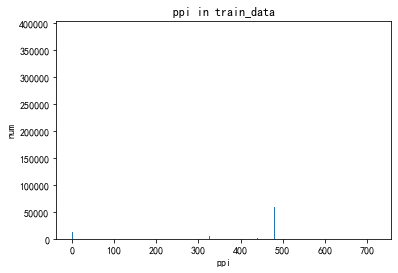

In [484]:
plt.bar(features['dev_ppi'].value_counts().index,features['dev_ppi'].value_counts().values)#横轴是ppi的值，纵轴是ppi的数量
plt.title("ppi in train_data")
plt.xlabel("ppi")
plt.ylabel("num")
plt.show()#从这个设备分辨率来看 是有点怪怪的  把小于250的全部变成480吧

In [485]:
#处理一下 如果低于250的 改成480吧
features['dev_ppi']=features['dev_ppi'].map(lambda x:480 if x<250 else x)
features['dev_ppi'].value_counts()#可以了

480.0    481177
320.0      8498
326.0      4857
640.0      2614
440.0      1251
          ...  
333.0         1
443.0         1
422.0         1
308.0         1
376.0         1
Name: dev_ppi, Length: 68, dtype: int64

In [486]:
#### 同样对测试集也进行这样的操作
test_features['dev_ppi']=test_features['dev_ppi'].map(lambda x:480 if x<250 else x)
test_features['dev_ppi'].value_counts()#可以了

480.0    144462
320.0      2503
326.0      1446
640.0       751
440.0       374
420.0       119
400.0       118
540.0        64
560.0        40
408.0        28
250.0        25
360.0        17
272.0        10
490.0         4
273.0         3
500.0         3
270.0         3
402.0         3
300.0         3
374.0         3
460.0         2
288.0         2
277.0         1
409.0         1
265.0         1
380.0         1
280.0         1
293.0         1
423.0         1
425.0         1
299.0         1
432.0         1
322.0         1
393.0         1
347.0         1
356.0         1
292.0         1
369.0         1
260.0         1
Name: dev_ppi, dtype: int64

#### 看一下location的分布,location是用户地理位置 有编号的 有332个城市对应不同的编号 所以这里好像没有什么异常 暂时不处理把

In [487]:
train['location'].value_counts()

48     14932
21     12655
0      11647
36      9472
6       8941
       ...  
326       37
327       32
295       16
329       14
330        5
Name: location, Length: 332, dtype: int64

#### 看一下ntt的分布,好像也没有什么异常 

In [488]:
train['ntt'].value_counts()

2.0    318597
6.0    116548
5.0     35021
0.0     20617
3.0      4463
4.0      4446
7.0       306
1.0         2
Name: ntt, dtype: int64

In [489]:
#### 看一下carrier运行商
train['carrier'].value_counts()#分别是电信 移动和联通

 46000.0    359409
 46001.0     43390
 0.0         40652
 46003.0     32294
-1.0         24255
Name: carrier, dtype: int64

In [490]:
import random
train['carrier']=train['carrier'].map(lambda x:[46001,46000,46003][random.randint(0,2)] if x in [0,-1] else x)
train['carrier'].value_counts()

46000.0    380885
46001.0     65192
46003.0     53923
Name: carrier, dtype: int64

In [491]:
train.iloc[np.where((train['carrier']==-1))][['carrier','label']]

,carrier,label


In [492]:
np.sum(train.iloc[np.where((train['carrier']==-1))]['label'])#从这里看出来  好像网络是-1跟最终标签没有什么绝对的影响

0

In [493]:
print(features.columns,len(features.columns.tolist()),'\n',test_features.columns,len(test_features.columns.tolist()))

Index(['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'lan', 'media_id', 'ntt', 'osv', 'package', 'timestamp',
       'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
       'fea_hash_len', 'fea1_hash_len', 'year', 'month', 'day', 'week_day',
       'hour', 'minute', 'time_diff', 'area'],
      dtype='object') 27 
 Index(['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'lan', 'media_id', 'ntt', 'osv', 'package', 'timestamp',
       'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
       'fea_hash_len', 'fea1_hash_len', 'year', 'month', 'day', 'week_day',
       'hour', 'minute', 'time_diff', 'area'],
      dtype='object') 27


In [494]:
# #把设备的宽和高给删除,因为已经有了面积
# features.drop(labels=['dev_height','dev_width'] ,axis=1,inplace=True)
# test_features.drop(labels=['dev_height','dev_width'] ,axis=1,inplace=True)
# print(features.columns,len(features.columns.tolist()),'\n',test_features.columns,len(test_features.columns.tolist()))

# 3.模型训练与预测

In [495]:
#使用模型来进行训练
# import lightgbm as lgb
# model=lgb.LGBMClassifier()
# model#模型已经准备好了

In [496]:
# 这次换用xgb来试试
import xgboost as xgb
model=xgb.XGBClassifier(max_depth=15, learning_rate=0.005, n_estimators=2000, 
            objective='binary:logistic',  
            subsample=0.8, colsample_bytree=0.7, 
            min_child_samples=3, eval_metric='auc', reg_lambda=0.5)
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7, eval_metric='auc',
              gamma=None, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.005,
              max_delta_step=None, max_depth=15, min_child_samples=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=0.5, scale_pos_weight=None, subsample=0.8,
              tree_method=None, validate_parameters=None, verbosity=None)

In [497]:
model.fit(features.drop(['timestamp'],axis=1),train['label'])
result=model.predict(test_features.drop(['timestamp'],axis=1))
result

[02:07:23] WARNING: ../src/learner.cc:516: 
Parameters: { min_child_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




array([0, 1, 0, ..., 1, 1, 1])

In [498]:
#得到结果之后转成csv
res=pd.DataFrame(test['sid'])
res['label']=result
res

,sid,label
0,1440682,0
1,1606824,1
2,1774642,0
3,1742535,0
4,1689686,1
...,...,...
149995,1165373,1
149996,1444115,1
149997,1134378,1
149998,1700238,1


# 4.提交结果文件并得到分数

In [500]:
res.to_csv("baselinexgb7.csv",index=False)#已经保存了  下一步再利用一些特征